In [1]:
# API call exercise for week ahead temperature forecast for Eindhoven. the source open-meteo requires further investigation 
# to know if we can fetch data for multiple cities in one call, twice per day
# below also  my reasoning to limit our model to 2x per day refreshing... based on frequence of underlying model updates

# installing required packages
%pip install requests pandas
import requests
import pandas as pd



Note: you may need to restart the kernel to use updated packages.


In [6]:

# Define API endpoint and parameters
BASE_URL = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 51.67,  # Den Bosch latitude
    "longitude": 5.29,  # Den Bosch longitude
    "hourly": "temperature_2m",
    "timezone": "Europe/Amsterdam",
    "forecast_days": 7  # Get 7 days ahead
}

# Call the API
response = requests.get(BASE_URL, params=params)

# Check response status
if response.status_code == 200:
    data = response.json()
    
    # Extract timestamps and temperatures
    timestamps = data["hourly"]["time"]
    temperatures = data["hourly"]["temperature_2m"]

    # Convert to DataFrame for easy handling
    df = pd.DataFrame({"Timestamp": timestamps, "Temperature (°C)": temperatures})
    
    # Convert timestamp to datetime format
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    
    # Display first few rows
    print(df.head())
    print(df.tail())

    # Display maximum temperature value
    max_temp = df["Temperature (°C)"].max()
    print(f"Maximum Temperature: {max_temp} °C")

else:
    print(f"Error: {response.status_code}, {response.text}")

            Timestamp  Temperature (°C)
0 2025-03-03 00:00:00               0.2
1 2025-03-03 01:00:00              -0.5
2 2025-03-03 02:00:00              -1.0
3 2025-03-03 03:00:00              -1.6
4 2025-03-03 04:00:00              -1.7
              Timestamp  Temperature (°C)
163 2025-03-09 19:00:00              11.3
164 2025-03-09 20:00:00              10.6
165 2025-03-09 21:00:00              10.1
166 2025-03-09 22:00:00               9.6
167 2025-03-09 23:00:00               9.1
Maximum Temperature: 16.8 °C


In [7]:
# Pivot the dataframe to show hours as rows and days as columns
df['Day'] = df['Timestamp'].dt.date
df['Hour'] = df['Timestamp'].dt.hour

pivot_df = df.pivot(index='Hour', columns='Day', values='Temperature (°C)')

# Display the pivot table
print(pivot_df)

Day   2025-03-03  2025-03-04  2025-03-05  2025-03-06  2025-03-07  2025-03-08  \
Hour                                                                           
0            0.2         1.4         0.9         3.2         7.2         6.7   
1           -0.5         1.7         0.7         2.4         6.8         6.1   
2           -1.0         1.4         0.4         2.1         6.4         5.4   
3           -1.6         0.9        -0.0         1.2         6.1         4.8   
4           -1.7         0.5        -0.0         1.0         5.8         4.4   
5           -2.6         0.2         0.1         0.6         5.4         3.8   
6           -2.5        -0.5        -0.0         0.4         5.2         3.4   
7           -2.2        -0.6        -0.3         0.8         5.4         3.6   
8           -2.8        -0.3        -0.0         2.2         6.6         4.8   
9            0.2         1.4         2.1         4.2         8.2         6.8   
10           1.9         4.0         5.1

Update Frequency underlying models (unverified):
	•	ECMWF (European Centre for Medium-Range Weather Forecasts)
	•	Updates twice daily (around 00:00 UTC and 12:00 UTC)
	•	GFS (Global Forecast System, by NOAA)
	•	Updates four times daily (at 00:00, 06:00, 12:00, and 18:00 UTC)
If you call the API multiple times a day, you might see updated predictions every 6 to 12 hours (depending on the model used).
	•	For the most up-to-date predictions, check after 0:00 UTC and 12:00 UTC when new ECMWF and GFS runs become available.

    As newly published day-head prices are published 12:00, and information needs to be processed, 14:00 and 2:00 might be best moments to refersh our week-ahead predictions models.

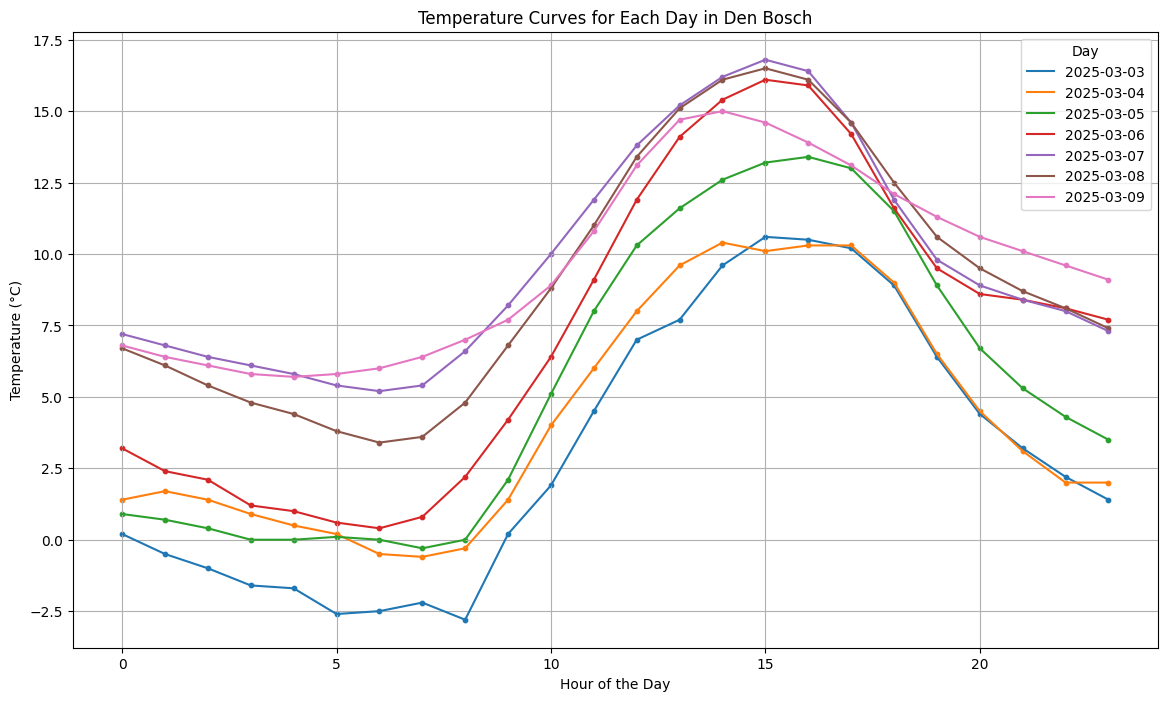

In [9]:
import matplotlib.pyplot as plt

# Plot temperature curves for each day
plt.figure(figsize=(14, 8))
for day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[day], label=str(day))
    plt.scatter(pivot_df.index, pivot_df[day], s=10)  # Add small dots for each hourly value

plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Curves for Each Day in Den Bosch')
plt.legend(title='Day')
plt.grid(True)
plt.show()

cloudcover,visibility,solar_radiation,windspeed_10m,humidity_2m are OTHER features influencing (renewable) energy production and/or consumption.. check if available in hourly forecast during 7 days...
